# Emotion Recognition using CNN

Importing libraries

In [1]:
!pip install tensorflow
!pip install keras
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

loading dataset

In [2]:
data = pd.read_csv("features.csv")

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,labels
0,-655.344543,86.649872,-12.361262,28.343275,-0.276913,9.111377,-10.830961,-0.023427,-17.030333,-3.272646,...,-5.887830,4.827703,-7.893806,3.420066,-1.663579,-3.320956,-4.437192,-0.790467,-2.032093,neutral
1,-475.233185,37.735450,6.484209,10.577263,5.573967,0.096649,-3.958552,-6.736961,-10.509263,-6.617795,...,-2.255615,-1.268973,-2.126151,-0.241190,-0.146999,-3.897475,-3.241440,0.042122,-2.748200,neutral
2,-724.307190,84.484085,-14.169809,31.049458,-3.062177,9.604400,-14.447046,-0.219916,-20.591162,2.434902,...,-4.020089,3.011853,-8.109156,3.908098,-5.972445,-3.686383,-5.658265,2.423278,-4.886252,neutral
3,-645.409851,87.810638,-17.773392,33.468960,-0.936478,8.191231,-9.919904,-3.311972,-18.590483,-2.199426,...,-6.660093,3.893641,-8.572474,2.928271,-3.344517,-3.604978,-4.101902,-1.308776,-0.581940,neutral
4,-571.465829,61.978770,-5.384902,21.352240,3.866039,1.307182,-5.972719,-7.355506,-14.538130,-3.855138,...,-4.927345,0.544567,-5.345915,0.225759,-0.831654,-4.492261,-4.453480,-0.986423,-1.763284,neutral


In [4]:
data['labels'].value_counts()

disgust      576
sad          576
happy        576
calm         576
surprised    576
angry        576
fearful      576
neutral      288
Name: labels, dtype: int64

splitting the data

In [5]:
X = data.iloc[: ,:-1].values
Y = data['labels'].values

In [6]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)

In [8]:
print(X_train.shape)
print(X_test.shape)

(3240, 20)
(1080, 20)


In [9]:
print(y_train.shape)
print(y_test.shape)

(3240, 8)
(1080, 8)


In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3240, 20), (3240, 8), (1080, 20), (1080, 8))

In [11]:
# making our data compatible to model.
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3240, 20, 1), (3240, 8), (1080, 20, 1), (1080, 8))

In [12]:
X_train.shape[0]

3240

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Conv1D for audio
model=Sequential()
# number of output filters in the convolution (filters=small features)
# kernel size = specifying length of the 1D convolution window
# strides = number of columns shifted at a time
model.add(Conv1D(256, kernel_size=5, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=3))

model.add(Conv1D(128, kernel_size=5, padding='same', activation='relu', kernel_regularizer=l2(0.007)))
model.add(MaxPooling1D(pool_size=3, padding = 'same'))
model.add(Dropout(0.5))

# model.add(Conv1D(64, kernel_size=5, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=3, padding = 'same'))
# model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 256)           1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 256)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 6, 128)            163968    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2, 128)           0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 2, 128)            0         
                                                                 
 flatten (Flatten)           (None, 256)               0

In [14]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=0.0000001)
history=model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test), callbacks=[rlrp])

Epoch 1/50
51/51 [==============================] - 3s 32ms/step - loss: 2.7114 - accuracy: 0.1556 - val_loss: 2.2909 - val_accuracy: 0.2259 - lr: 0.0010
Epoch 2/50
51/51 [==============================] - 1s 24ms/step - loss: 2.1750 - accuracy: 0.1966 - val_loss: 2.0427 - val_accuracy: 0.2769 - lr: 0.0010
Epoch 3/50
51/51 [==============================] - 1s 25ms/step - loss: 2.0382 - accuracy: 0.2287 - val_loss: 1.9415 - val_accuracy: 0.2713 - lr: 0.0010
Epoch 4/50
51/51 [==============================] - 1s 24ms/step - loss: 1.9660 - accuracy: 0.2580 - val_loss: 1.8618 - val_accuracy: 0.3102 - lr: 0.0010
Epoch 5/50
51/51 [==============================] - 1s 24ms/step - loss: 1.9290 - accuracy: 0.2599 - val_loss: 1.8171 - val_accuracy: 0.3148 - lr: 0.0010
Epoch 6/50
51/51 [==============================] - 1s 25ms/step - loss: 1.8862 - accuracy: 0.2929 - val_loss: 1.7707 - val_accuracy: 0.3713 - lr: 0.0010
Epoch 7/50
51/51 [==============================] - 1s 24ms/step - loss: 1.8

51/51 [==============================] - 1s 25ms/step - loss: 1.3754 - accuracy: 0.5444 - val_loss: 1.3567 - val_accuracy: 0.5444 - lr: 6.4000e-05


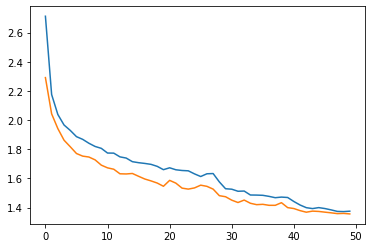

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

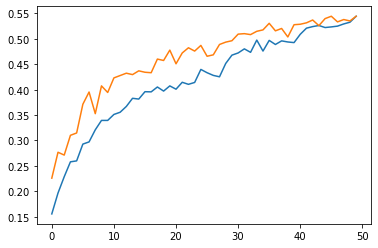

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [17]:
# predicting on test data.
pred_test = model.predict(X_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

In [18]:
y_pred.shape, y_test.shape

((1080, 1), (1080, 1))

In [19]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test

df.head(10)

,Predicted Labels,Actual Labels
0,fearful,fearful
1,happy,angry
2,fearful,fearful
3,calm,calm
4,angry,angry
5,surprised,surprised
6,fearful,fearful
7,fearful,happy
8,fearful,fearful
9,surprised,sad


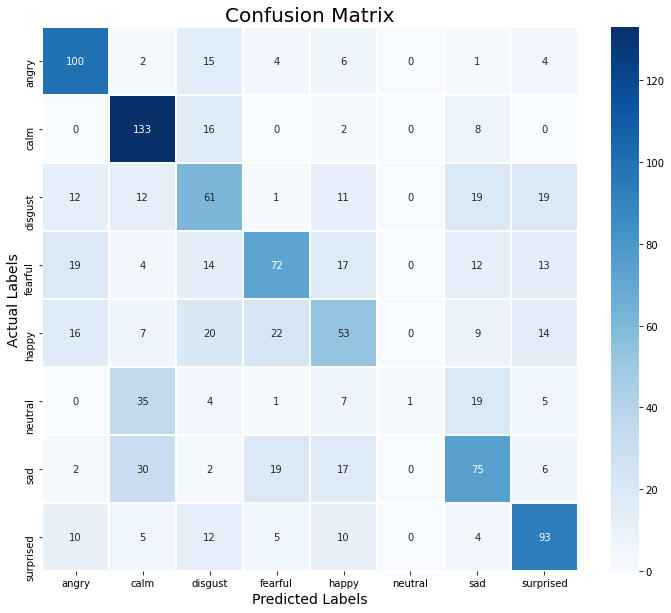

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.63      0.76      0.69       132
        calm       0.58      0.84      0.69       159
     disgust       0.42      0.45      0.44       135
     fearful       0.58      0.48      0.52       151
       happy       0.43      0.38      0.40       141
     neutral       1.00      0.01      0.03        72
         sad       0.51      0.50      0.50       151
   surprised       0.60      0.67      0.63       139

    accuracy                           0.54      1080
   macro avg       0.60      0.51      0.49      1080
weighted avg       0.57      0.54      0.52      1080



In [22]:
test = pd.read_csv("test.csv")
data = test.iloc[: ,:-1].values
labels = test['labels'].values

In [23]:
test.shape

(39, 21)

In [24]:
data.shape

(39, 20)

In [25]:
test = scaler.transform(data)

In [26]:
test = np.expand_dims(test, axis=2)

In [27]:
prediction = model.predict(test)
result = encoder.inverse_transform(prediction)

In [28]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = result.flatten()
df['Actual Labels'] = labels.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,calm,sad
1,disgust,sad
2,calm,sad
3,angry,angry
4,disgust,angry
5,angry,angry
6,surprised,surprised
7,surprised,surprised
8,sad,surprised
9,disgust,happy


In [29]:
df

,Predicted Labels,Actual Labels
0,calm,sad
1,disgust,sad
2,calm,sad
3,angry,angry
4,disgust,angry
5,angry,angry
6,surprised,surprised
7,surprised,surprised
8,sad,surprised
9,disgust,happy
